In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("House Price India.csv")

# Display first few rows
print(df.head())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [24]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

Since df.info() shows no missing values, we don't need to impute anything here.

In [25]:
#Dropping Unnecessary Columns
df.drop(columns=['id', 'Postal Code'], inplace=True)

In [26]:
df.drop(columns=['Date'], inplace=True)

Now we do feature scaling to ensures that large numeric values don’t dominate the model. We use StandardScaler for algorithms like Linear Regression and XGBoost and as we regressional data of house prices.

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['living area', 'lot area', 'Area of the house(excluding basement)',
                      'Area of the basement', 'Distance from the airport']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

As the dataset has no categorical variables, no need to encode Categorical Features with One-Hot Encoding or Label Encoding.

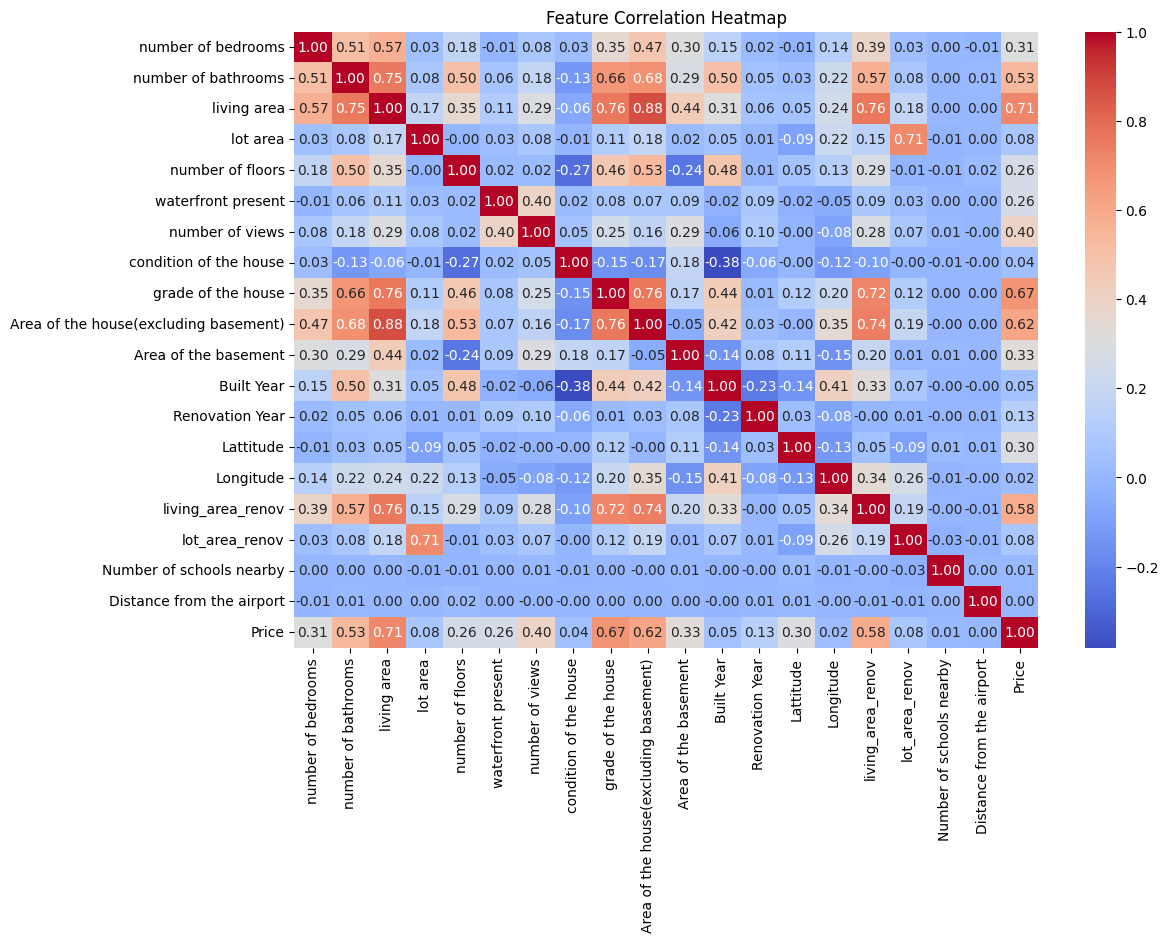

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


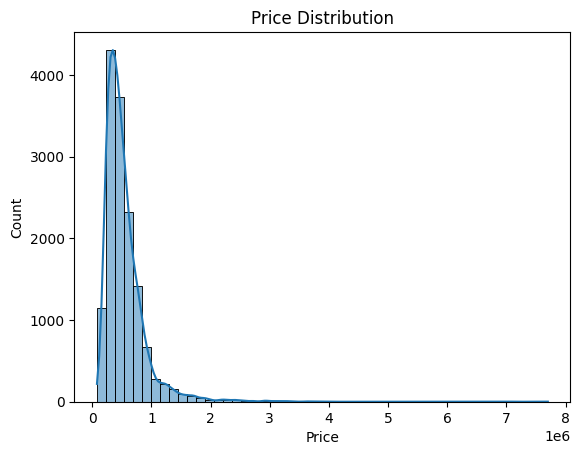

In [29]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()


In [30]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, training Regression Models

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

Text(0.5, 1.0, 'LinearRegressor')

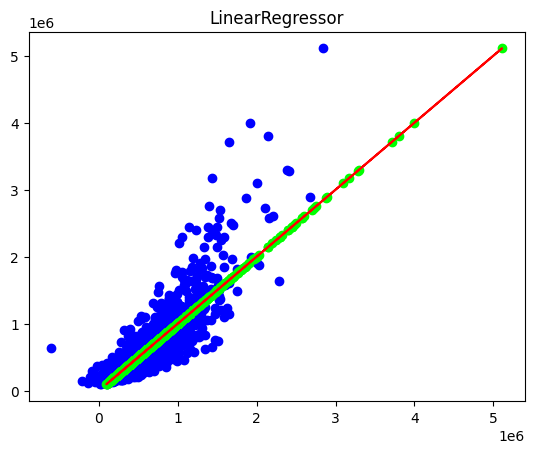

In [ ]:
plt.scatter(y_pred_lr, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("LinearRegressor")

In [ ]:
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 124303.41754039135
RMSE: 199117.2207829545
R² Score: 0.7186491417989993


Text(0.5, 1.0, 'DecisionTreeRegressor')

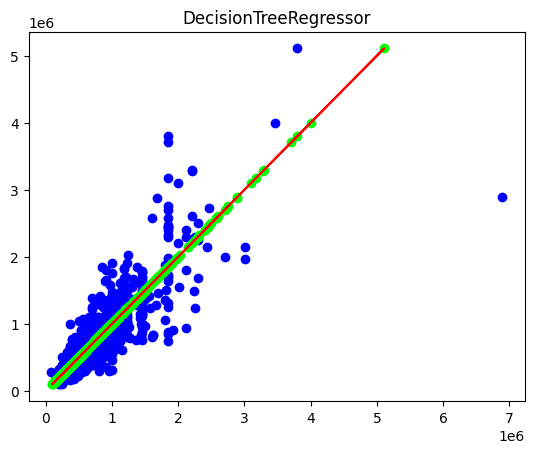

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

plt.scatter(y_pred_dt, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("DecisionTreeRegressor")

In [ ]:
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))

Decision Tree Performance:
MAE: 95286.59915262547
RMSE: 185401.8331487749
R² Score: 0.7560736887816815


Text(0.5, 1.0, 'RandomForestRegressor')

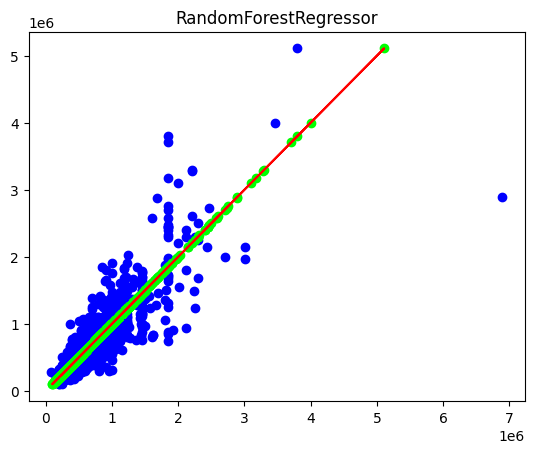

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
plt.scatter(y_pred_dt, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("RandomForestRegressor")

In [ ]:
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 69254.56310875513
RMSE: 132240.06843664846
R² Score: 0.8759043005990998


Text(0.5, 1.0, 'XGBRegressor')

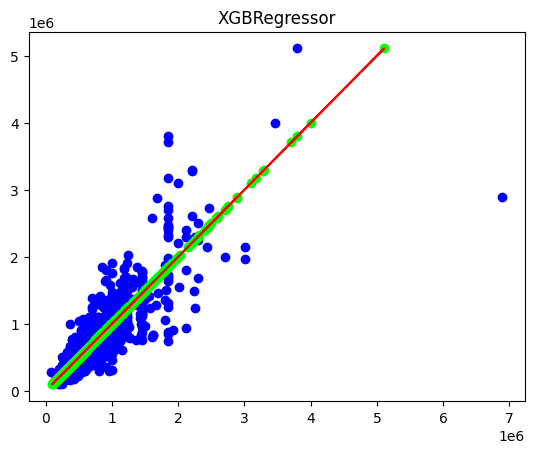

In [ ]:
#XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

plt.scatter(y_pred_dt, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("XGBRegressor")

In [ ]:
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost Performance:
MAE: 65654.734375
RMSE: 133061.0869638453
R² Score: 0.874358594417572


Why is Random Forest the best choice?
*   **Lowest RMSE** (132,240): Indicates the model has lower overall error in predictions.
*   **Highest R² Score** (0.8759): Shows that it explains the most variance in house prices.
*   **Low MAE** (69,254.56): The average absolute error is lower than Linear Regression and Decision Tree.

XGBoost has slightly **lower MAE** than Random Forest, but **higher RMSE**, meaning its predictions have slightly larger errors in certain cases.

Hence, **Random Forest is the best model for this dataset.**

In [ ]:
#Hyperparameter Optimization for Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,           # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1,     # Use all CPU cores for parallel processing
    verbose=3
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Train the best Random Forest model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Optimized Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("R² Score:", r2_score(y_test, y_pred_best_rf))


In [32]:
#Save the Trained Model
import joblib

joblib.dump(rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [34]:
pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00


FastAPI application

In [41]:
%%writefile /content/fastapi_app.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field
import joblib
import numpy as np
import logging

# Initialize FastAPI app
app = FastAPI(title="House Price Prediction API", version="1.0")

# Load the trained model
try:
    model = joblib.load("/content/best_random_forest_model.pkl")
    logging.info("Model loaded successfully.")
except Exception as e:
    logging.error(f"Failed to load model: {str(e)}")
    raise RuntimeError("Model loading failed. Ensure 'best_random_forest_model.pkl' exists.")

# Configure logging
logging.basicConfig(
    filename="/content/fastapi_app.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

# Define request schema with validation
class HouseFeatures(BaseModel):
    features: list[float] = Field(..., description="List of numerical house features.")

@app.get("/")
def home():
    return {"message": "Welcome to the House Price Prediction API!"}

@app.post("/predict")
def predict(data: HouseFeatures):
    try:
        features = np.array(data.features).reshape(1, -1)  # Convert input to NumPy array

        # Validate number of features
        expected_features = model.n_features_in_
        if len(data.features) != expected_features:
            raise ValueError(f"Expected {expected_features} features, but got {len(data.features)}.")

        # Predict house price
        prediction = model.predict(features)[0]
        price = float(prediction)

        # Log request and response
        logging.info(f"Input: {data.features} | Predicted Price: {price}")

        return {"predicted_price": price}

    except ValueError as ve:
        logging.warning(f"Validation Error: {str(ve)}")
        raise HTTPException(status_code=422, detail=str(ve))

    except Exception as e:
        logging.error(f"Server Error: {str(e)}")
        raise HTTPException(status_code=500, detail="Internal Server Error. Check logs for details.")


Writing /content/fastapi_app.py


In [42]:
ls /content


 best_random_forest_model.pkl   fastapi_app.py  'House Price India.csv'   sample_data/


In [46]:
%cd /content

!uvicorn fastapi_app:app --host 0.0.0.0 --port 5000 --reload


/content
INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:5000 (Press CTRL+C to quit)
INFO:     Started reloader process [54904] using StatReload
INFO:     Started server process [54910]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [54910]
INFO:     Stopping reloader process [54904]


In [48]:
pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.8/672.8 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.4 MB/s eta 0:00:00


In [49]:
import mlflow
mlflow.sklearn.log_model(best_rf, "random_forest_model")


2025/03/09 00:24:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
